> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description TMDb Data Analysis 

###### this dataset has information about 10 thousand movies which contains users ratings ,budgets and revenues, this dataset consists of 21 columns and 10866 movie.


## questions that could be analyised :-

##### 1-which genres are most popular from year to year ?And how were they changed over the years?
#####  2-Do revenues increase or decrease over the years? And is the movies which have high vote average have a high revenue?
##### 3-which movie had the lowest revenue ?
##### 4-which movies had the lowest vote average ?
##### 5- Which directors have directed most movies?
##### 6-  which genres of movies have been produced alot?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


#### Step one| Reading and explore data:-

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]


#### Step two|Data cleaning( Remove unnecessary columns):-

 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','imdb_id','tagline','overview','homepage','budget_adj','revenue_adj'] ,axis=1 , inplace = True)


In [5]:
df.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

#### Step three| remove duplicates

In [6]:
sum(df.duplicated())

1

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 14)


#### Step four| fill Na raws:-

In [8]:
df.fillna('Not Available',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10865 non-null  object 
 5   director              10865 non-null  object 
 6   keywords              10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10865 non-null  object 
 9   production_companies  10865 non-null  object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis:-






##### caculate the profit and index it un anew column:

In [9]:
df.insert(3,'profit',df['revenue']-df['budget'])


In [10]:
df.head()

popularity     budget     revenue      profit  \
0   32.985763  150000000  1513528810  1363528810   
1   28.419936  150000000   378436354   228436354   
2   13.112507  110000000   295238201   185238201   
3   11.173104  200000000  2068178225  1868178225   
4    9.335014  190000000  1506249360  1316249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

#### Display general statistics:-

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()

popularity        budget       revenue        profit       runtime  \
count  10865.000000  1.086500e+04  1.086500e+04  1.086500e+04  10865.000000   
mean       0.646446  1.462429e+07  3.982690e+07  2.520261e+07    102.071790   
std        1.000231  3.091428e+07  1.170083e+08  9.659103e+07     31.382701   
min        0.000065  0.000000e+00  0.000000e+00 -4.139124e+08      0.000000   
25%        0.207575  0.000000e+00  0.000000e+00  0.000000e+00     90.000000   
50%        0.383831  0.000000e+00  0.000000e+00  0.000000e+00     99.000000   
75%        0.713857  1.500000e+07  2.400000e+07  9.092453e+06    111.000000   
max       32.985763  4.250000e+08  2.781506e+09  2.544506e+09    900.000000   

         vote_count  vote_average  release_year  
count  10865.000000  10865.000000  10865.000000  
mean     217.399632      5.975012   2001.321859  
std      575.644627      0.935138     12.813260  
min       10.000000      1.500000   1960.000000  
25%       17.000000      5.400000   1995.000000  
50%       38.000000      6.000000   2006.000000  
75%      146.000000      6.600000   2011.000000  
max     9767.000000      9.200000   2015.000000

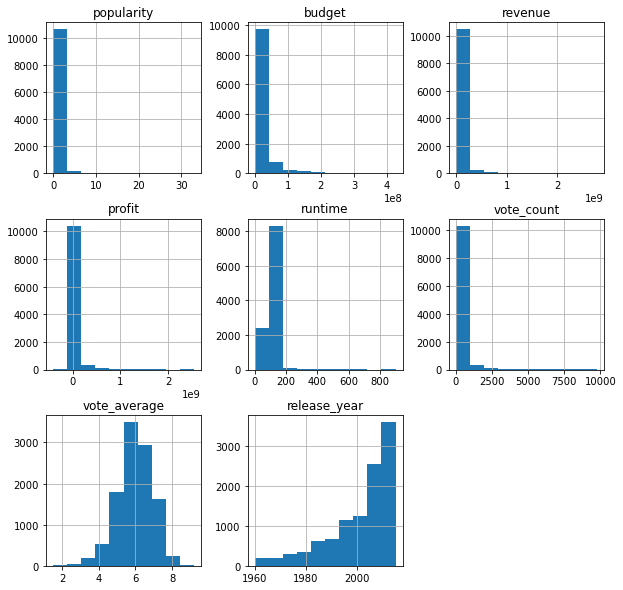

In [12]:
df.hist(figsize=(10,10));

### Research Question 1 :which genres are most popular from year to year ?And how were they changed over the years?

In [14]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.groupby('release_year')['genres'].agg(pd.Series.mode)

release_year
1970-01-01 00:00:00.000001960                                     Horror
1970-01-01 00:00:00.000001961                            [Drama, Horror]
1970-01-01 00:00:00.000001962                                      Drama
1970-01-01 00:00:00.000001963                                     Horror
1970-01-01 00:00:00.000001964                             Comedy|Romance
1970-01-01 00:00:00.000001965    [Action|Adventure|Drama|Western, Drama]
1970-01-01 00:00:00.000001966                             Action|Western
1970-01-01 00:00:00.000001967                       Comedy|Drama|Romance
1970-01-01 00:00:00.000001968                                      Drama
1970-01-01 00:00:00.000001969                                      Drama
1970-01-01 00:00:00.000001970                                     Horror
1970-01-01 00:00:00.000001971                                      Drama
1970-01-01 00:00:00.000001972                                     Comedy
1970-01-01 00:00:00.000001973         

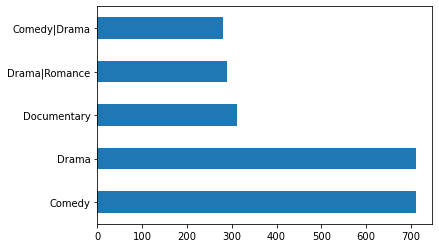

In [15]:
df['genres'].value_counts().head().plot.barh();


In which year were the most films produced?

In [16]:
df['release_year'].mode()[0]

Timestamp('1970-01-01 00:00:00.000002014')

In [17]:
df['release_year'].value_counts().plot.barh(figsize=(15,10));

### The Number of movies increase by years 

which movie had the lowest revenue ?

In [17]:
df[df['revenue']==df['revenue'].min()]

popularity    budget  revenue                  original_title  \
48       2.932340  30000000        0                       Wild Card   
67       2.331636  20000000        0                        Survivor   
74       2.165433         0        0          Mythica: The Darkspore   
75       2.141506         0        0  Me and Earl and the Dying Girl   
92       1.876037         0        0        Mythica: The Necromancer   
...           ...       ...      ...                             ...   
10861    0.080598         0        0              The Endless Summer   
10862    0.065543         0        0                      Grand Prix   
10863    0.065141         0        0             Beregis Avtomobilya   
10864    0.064317         0        0          What's Up, Tiger Lily?   
10865    0.035919     19000        0        Manos: The Hands of Fate   

                                                    cast             director  \
48     Jason Statham|Michael Angarano|Milo Ventimigli...           Simon West   
67     Pierce Brosnan|Milla Jovovich|Dylan McDermott|...       James McTeigue   
74     Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...        Anne K. Black   
75     Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...  Alfonso Gomez-Rejon   
92     Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...        A. Todd Smith   
...                                                  ...                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...          Bruce Brown   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   John Frankenheimer   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...       Eldar Ryazanov   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...          Woody Allen   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...     Harold P. Warren   

                                             keywords  runtime  \
48                          gambling|bodyguard|remake       92   
67     new year's eve|fire|showdown|terrorist|embassy       96   
74     sword|magic|sorcery|necromancer|woman director      108   
75         tattoo|high school|leukemia|friends|parody      105   
92                    sword|magic|sorcery|necromancer        0   
...                                               ...      ...   
10861                        surfer|surfboard|surfing       95   
10862                       car race|racing|formula 1      176   
10863                        car|trolley|stealing car       94   
10864                                           spoof       80   
10865             fire|gun|drive|sacrifice|flashlight       74   

                         genres  \
48         Thriller|Crime|Drama   
67        Crime|Thriller|Action   
74     Action|Adventure|Fantasy   
75                 Comedy|Drama   
92     Fantasy|Action|Adventure   
...                         ...   
10861               Documentary   
10862    Action|Adventure|Drama   
10863            Mystery|Comedy   
10864             Action|Comedy   
10865                    Horror   

                                    production_companies release_date  \
48     Current Entertainment|Lionsgate|Sierra / Affin...      1/14/15   
67     Nu Image Films|Winkler Films|Millennium Films|...      5/21/15   
74                              Arrowstorm Entertainment      6/24/15   
75                                     Indian Paintbrush      6/12/15   
92     Arrowstorm Entertainment|Camera 40 Productions...     12/19/15   
...                                                  ...          ...   
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

       vote_count  vote_average  release_year  
48            481           5.

who is the director with the most movies?


### Question two |Do revenues increase or decrease over the years? And is the movies which have high vote average have a high revenue?

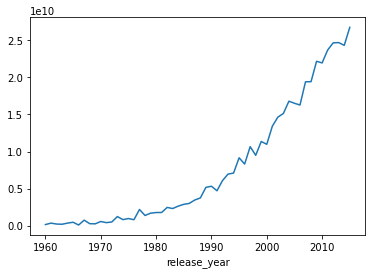

In [20]:
most_revenues=df.groupby('release_year')['revenue'].sum().plot()


####  This plot indicates Revenues increase by the years .

In [21]:
df.groupby('vote_average')['revenue'].sum().plot(x='vote_average',y='revenue')
plt.title('average revenue and vote average')
plt.xlabel('vote average')
plt.ylabel('revenue');
 

### most of movies with high revenues are with median vote average ..so its not a rulethat  the movie with high revenue is agreat movie.

### Question Three| Which directors have directed most movies?

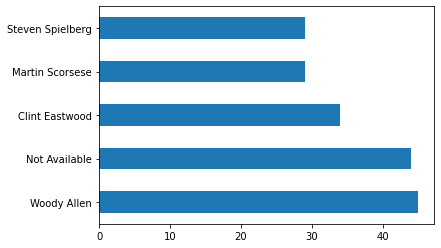

In [22]:
count_director=df['director'].value_counts().head()
count_director.plot.barh();

#### directors with most numbers of movies are: Woody Allen, Clint Estwood , Martin Scorsese ,I think the reason od that is movies genres and the audience controlled that.

In [43]:
df['director'].mode()[0]

'Woody Allen'

### Question four | which movies had the lowest vote average ?

In [18]:
df[df['vote_average']==df['vote_average'].min()]

popularity  budget  revenue            original_title  \
7772     0.121120       0        0             Transmorphers   
10865    0.035919   19000        0  Manos: The Hands of Fate   

                                                    cast          director  \
7772   Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...       Leigh Scott   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...  Harold P. Warren   

                                  keywords  runtime  \
7772                            futuristic       86   
10865  fire|gun|drive|sacrifice|flashlight       74   

                                 genres production_companies release_date  \
7772   Action|Adventure|Science Fiction          Asylum, The      6/26/07   
10865                            Horror            Norm-Iris     11/15/66   

       vote_count  vote_average  release_year  
7772           10           1.5          2007  
10865          15           1.5          1966

### Question five| which genres of movies have been produced alot?

In [10]:
df['genres'].value_counts().head()

Comedy           712
Drama            712
Documentary      312
Drama|Romance    289
Comedy|Drama     280
Name: genres, dtype: int64

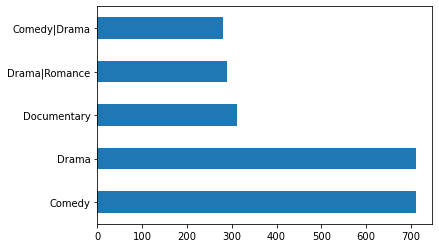

In [15]:
count_genres=df['genres'].value_counts().head()
count_genres.plot.barh();

#### Comedy and Drama are the most popular genres

## Conclusions


### the average budget is 1.462570e+07 .

### most of movies were produced at the time between 1995-2011.


### most of movies had 6.0 vote average.

### the director with the most movies is Woody Allen.

### the revenues increases by years.

### the most genres have been produced are comedy and drama.

<a id='conclusions'></a>.

### Limitations
budget and revenue have not any curreny sign and have alot of zero values. 
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1